In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_ev_data():
    if os.path.isfile('EV_Charging_Stations.csv'):
        print('Found file')
        # If csv file exists read in data from csv file.
        df = pd.read_csv('EV_Charging_Stations.csv', index_col=0)
        
        return df

In [3]:
df = get_ev_data()

Found file


In [4]:
df.head()

,Y,Station_Name,City,Street_Address,ZIP,ev_connector_types,ev_network,ev_network_web,Level1_Plugs,Level2_Plugs,DCFC_Plugs,Total_Plugs,Level2,DCFC,Tesla,recid,ESRI_OID
X,,,,,,,,,,,,,,,,,
-95.372854,29.756604,BROOKFIELD PROP 300 CLAY STAT1,Houston,300 Clay St,77002,J1772,ChargePoint Network,http://www.chargepoint.com/,0,2,0,2,Level2,No,No,358,1480
-97.759109,30.206145,Clay Cooley Nissan,Austin,4914 S IH-35,78745,CHADEMOJ1772,Non-Networked,NaN,0,2,1,3,Level2,DCFC,No,379,1486
-99.771463,32.408909,McGavock Nissan - Abilene,Abilene,818 E Overland Trail,79606,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,380,1874
-101.938937,35.159354,McGavock Nissan - Amarillo,Amarillo,4700 S Soncy Rd,79119,J1772,Non-Networked,NaN,0,2,0,2,Level2,No,No,381,1860
-97.087169,32.676458,Don Davis Nissan,Arlington,1320 E Interstate 20,76018,J1772,Non-Networked,NaN,0,1,0,1,Level2,No,No,382,1875


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, -95.372854 to -96.753363
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Y                   2927 non-null   float64
 1   Station_Name        2927 non-null   object 
 2   City                2927 non-null   object 
 3   Street_Address      2927 non-null   object 
 4   ZIP                 2927 non-null   int64  
 5   ev_connector_types  2927 non-null   object 
 6   ev_network          2927 non-null   object 
 7   ev_network_web      2715 non-null   object 
 8   Level1_Plugs        2927 non-null   int64  
 9   Level2_Plugs        2927 non-null   int64  
 10  DCFC_Plugs          2927 non-null   int64  
 11  Total_Plugs         2927 non-null   int64  
 12  Level2              2927 non-null   object 
 13  DCFC                2927 non-null   object 
 14  Tesla               2927 non-null   object 
 15  recid               2927 non-null   int64  
 

In [6]:
df.shape

(2927, 17)

In [7]:
df = df.ev_connector_types.value_counts()

In [8]:
# List of connector types to combine
connector_types_to_combine_a = ['J1772']
connector_types_to_combine_b = ['J1772COMBO', 'J1772J1772COMBO']
connector_types_to_combine_c = ['TESLA', 'J1772TESLA']
connector_types_to_combine_d = ['CHADEMOJ1772', 'CHADEMOJ1772J1772COMBO']
connector_types_to_isolate_b = ['J1772NEMA515']

# Create a new Series that combines the counts
sae_connector = df[connector_types_to_combine_a].sum()
css_connector = df[connector_types_to_combine_b].sum()
tesla_connector =  df[connector_types_to_combine_c].sum()
chade_connector = df[connector_types_to_combine_d].sum()
# nema_515_connector = df[connector_types_to_isolate_b].sum()

df['sae_connector'] = sae_connector
df['tesla_connector'] = tesla_connector
df['css_connector'] = css_connector
df['chade_connector'] = chade_connector
# df['nema_515_connector'] = nema_515_connector

In [9]:
df

ev_connector_types
J1772                     2198
TESLA                      307
CHADEMOJ1772COMBO          161
J1772TESLA                 126
J1772COMBO                  69
CHADEMOJ1772J1772COMBO      49
CHADEMOJ1772                10
J1772J1772COMBO              4
J1772NEMA515                 3
sae_connector             2198
tesla_connector            433
css_connector               73
chade_connector             59
Name: count, dtype: int64

In [10]:
indexes_to_drop = ['J1772', 'TESLA', 'CHADEMOJ1772COMBO', 'J1772TESLA', 'J1772COMBO', 'CHADEMOJ1772J1772COMBO', 'CHADEMOJ1772', 'J1772J1772COMBO', 'J1772NEMA515']
df = df.drop(indexes_to_drop)

In [11]:
df

ev_connector_types
sae_connector      2198
tesla_connector     433
css_connector        73
chade_connector      59
Name: count, dtype: int64

In [12]:
def plot_ev(data):
    plt.figure(figsize=(10, 6))

    max_value = df.sae_connector

    cols = ['lightgrey' if (x < max(data)) else 'lightgreen' for x in data]
    ax = sns.barplot(x = data, y = data.index, palette=cols)
    sns.despine(left=True, bottom=True, trim=True)
    plt.xticks([])  # Empty list to remove x-axis ticks
    plt.gca().set_xlabel('')
    plt.title('Electric Vehicle Connector Types in Texas')

    custom_labels = ['SAE J1772 Charger     ', 'CCS (Combo) Connector     ', 'CHAdeMO Connector     ',
                     'Tesla Connector     ']
    
    ax.set_yticklabels(custom_labels, color='grey')

    for label in ax.get_yticklabels():
        if label.get_text() == 'SAE J1772 Charger     ':
            label.set_fontweight('bold')
    
    ax.tick_params(axis='y', length=0)
    
    for i, bar in enumerate(ax.patches):
        width = bar.get_width()
        height = bar.get_height()
        x_pos = bar.get_x() + width  # Adjusted x-coordinate
        y_pos = bar.get_y() + height / 2  # Centered y-coordinate
        
        font_weight = 'bold' if width == max_value else 'normal'
        
        ax.annotate(f'{width:.0f}',
                    xy=(x_pos, y_pos),
                    xytext=(5, 0),  # Adjust the horizontal offset here
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10, color='black', weight=font_weight)

/var/folders/hz/r10rvhgs41x5bxdmg79hksdw0000gn/T/ipykernel_35995/3912998721.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data, y = data.index, palette=cols)


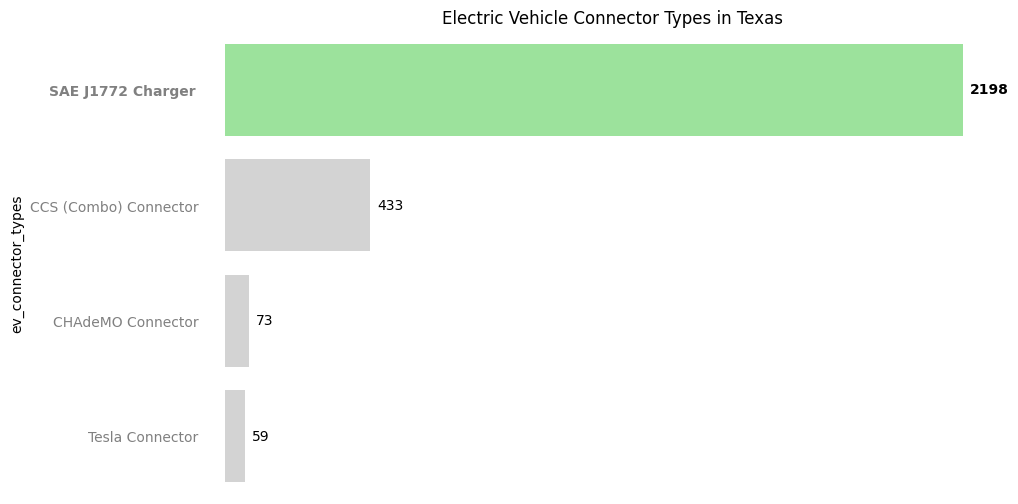

In [13]:
plot_ev(df)
plt.show()